In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
import pandas_datareader.data as web
from keras.layers import Dense,Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
AAPL=pd.read_csv('AAPL.csv')
TSLA=pd.read_csv('TSLA.csv')
GOOG=pd.read_csv('GOOG.csv')
MSFT=pd.read_csv('MSFT.csv')
MSFT=pd.read_csv('MSFT.csv')

In [3]:
AAPL

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,122.59,124.85,121.20,121.26,121.26,"16,43,20,000"
1,25-Feb-2021,124.68,126.46,120.54,120.99,120.99,"14,73,06,500"
2,24-Feb-2021,124.94,125.56,122.23,125.35,125.35,"11,06,91,500"
3,23-Feb-2021,123.76,126.71,118.39,125.86,125.86,"15,78,59,100"
4,22-Feb-2021,128.01,129.72,125.60,126.00,126.00,"10,36,07,600"
...,...,...,...,...,...,...,...
9795,09-Aug-1982,0.06,0.06,0.06,0.06,0.04,"5,61,12,000"
9796,06-Aug-1982,0.06,0.06,0.05,0.05,0.04,"9,68,35,200"
9797,05-Aug-1982,0.06,0.06,0.06,0.06,0.04,"6,97,53,600"
9798,04-Aug-1982,0.06,0.06,0.06,0.06,0.05,"8,38,65,600"


In [7]:
start_date=datetime(2000, 1, 1)

In [12]:
stock='AAPL'
AAPL_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [13]:
AAPL_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...
2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004


In [14]:
#1 reset the date indec to column
AAPL_df=AAPL_df.reset_index()

In [16]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...,...
5604,2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
5605,2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
5606,2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004
5607,2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994


In [17]:
AAPL_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5609.000000,5609.000000,5609.000000,5609.000000,5.609000e+03,5609.000000
mean,26.411843,25.849296,26.129800,26.142091,4.247884e+08,25.041473
std,38.491320,37.628259,38.053501,38.080820,3.886395e+08,37.999604
min,0.235536,0.227143,0.231964,0.234286,3.934000e+07,0.200613
25%,1.587500,1.549643,1.571786,1.571429,1.532140e+08,1.345574
50%,12.078571,11.875714,11.992857,11.973571,3.081512e+08,10.252658
75%,31.600000,31.090000,31.392500,31.330000,5.648132e+08,28.584785
max,182.940002,179.119995,182.630005,182.009995,7.421641e+09,181.778397


In [18]:
AAPL.describe()

,High,Low,Close,Adj. Close
count,9725.000000,9725.000000,9725.000000,9725.000000
mean,10.941710,10.704146,10.827131,10.240084
std,21.468368,20.958249,21.222958,20.886798
min,0.060000,0.050000,0.050000,0.040000
25%,0.310000,0.300000,0.300000,0.250000
50%,0.490000,0.470000,0.480000,0.400000
75%,12.850000,12.610000,12.720000,10.950000
max,145.090000,141.370000,143.160000,142.950000


In [19]:
AAPL.dropna(inplace = True)

In [20]:
AAPL

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,122.59,124.85,121.20,121.26,121.26,"16,43,20,000"
1,25-Feb-2021,124.68,126.46,120.54,120.99,120.99,"14,73,06,500"
2,24-Feb-2021,124.94,125.56,122.23,125.35,125.35,"11,06,91,500"
3,23-Feb-2021,123.76,126.71,118.39,125.86,125.86,"15,78,59,100"
4,22-Feb-2021,128.01,129.72,125.60,126.00,126.00,"10,36,07,600"
...,...,...,...,...,...,...,...
9795,09-Aug-1982,0.06,0.06,0.06,0.06,0.04,"5,61,12,000"
9796,06-Aug-1982,0.06,0.06,0.05,0.05,0.04,"9,68,35,200"
9797,05-Aug-1982,0.06,0.06,0.06,0.06,0.04,"6,97,53,600"
9798,04-Aug-1982,0.06,0.06,0.06,0.06,0.05,"8,38,65,600"


In [23]:
AAPL.describe()

,High,Low,Close,Adj. Close
count,9725.000000,9725.000000,9725.000000,9725.000000
mean,10.941710,10.704146,10.827131,10.240084
std,21.468368,20.958249,21.222958,20.886798
min,0.060000,0.050000,0.050000,0.040000
25%,0.310000,0.300000,0.300000,0.250000
50%,0.490000,0.470000,0.480000,0.400000
75%,12.850000,12.610000,12.720000,10.950000
max,145.090000,141.370000,143.160000,142.950000


In [24]:
AAPL.describe()

,High,Low,Close,Adj. Close
count,9725.000000,9725.000000,9725.000000,9725.000000
mean,10.941710,10.704146,10.827131,10.240084
std,21.468368,20.958249,21.222958,20.886798
min,0.060000,0.050000,0.050000,0.040000
25%,0.310000,0.300000,0.300000,0.250000
50%,0.490000,0.470000,0.480000,0.400000
75%,12.850000,12.610000,12.720000,10.950000
max,145.090000,141.370000,143.160000,142.950000


In [25]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...,...
5604,2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
5605,2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
5606,2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004
5607,2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994


In [26]:
# 2 .Drop null values
AAPL_df.dropna(inplace = True)

In [28]:
AAPL_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5609.000000,5609.000000,5609.000000,5609.000000,5.609000e+03,5609.000000
mean,26.411843,25.849296,26.129800,26.142091,4.247884e+08,25.041473
std,38.491320,37.628259,38.053501,38.080820,3.886395e+08,37.999604
min,0.235536,0.227143,0.231964,0.234286,3.934000e+07,0.200613
25%,1.587500,1.549643,1.571786,1.571429,1.532140e+08,1.345574
50%,12.078571,11.875714,11.992857,11.973571,3.081512e+08,10.252658
75%,31.600000,31.090000,31.392500,31.330000,5.648132e+08,28.584785
max,182.940002,179.119995,182.630005,182.009995,7.421641e+09,181.778397


In [29]:
#3.sort the datavalues by date
AAPL_df.sort_values(by = 'Date', ignore_index = True)

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...,...
5604,2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
5605,2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
5606,2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004
5607,2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994


In [30]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.786033
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855796
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783644
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.795111
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.726304
...,...,...,...,...,...,...,...
5604,2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
5605,2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
5606,2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004
5607,2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994


In [31]:
#4 Drop rows having Date < '2015-01-01'
AAPL_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)

In [32]:
AAPL_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1835.000000,1835.000000,1835.000000,1835.000000,1.835000e+03,1835.000000
mean,66.265892,64.865312,65.554052,65.597886,1.362454e+08,64.111350
std,45.227652,44.126824,44.673707,44.704581,6.907691e+07,45.299902
min,22.917500,22.367500,22.500000,22.584999,4.100000e+07,21.009535
25%,31.962500,31.472501,31.753750,31.708750,8.950025e+07,28.842615
50%,45.597500,44.542500,45.072498,44.992500,1.168508e+08,43.733555
75%,89.502499,87.779999,88.486252,88.308750,1.626972e+08,87.347553
max,182.940002,179.119995,182.630005,182.009995,6.488252e+08,181.778397


In [36]:
#5 Change Dtype of Columns
AAPL_df['Date']=pd.to_datetime(AAPL_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    AAPL_df[col]=AAPL_df[col].astype(str).str.replace(',','')

In [37]:
AAPL_df=AAPL_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

In [38]:
AAPL_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714506
1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018257
2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020517
3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357342
4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.293211
...,...,...,...,...,...,...,...
1830,2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
1831,2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
1832,2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004
1833,2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994


In [39]:
stock='TSLA'
TSLA_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [40]:
stock='AMZN'
AMZN_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [41]:
stock='GOOG'
GOOG_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [42]:
stock='MSFT'
MSFT_df=web.DataReader(stock,data_source='yahoo',start=start_date)

In [47]:
#1 reset the date indec to column
MSFT_df=AAPL_df.reset_index()
TSLA_df=TSLA_df.reset_index()
GOOG_df=GOOG_df.reset_index()
AMZN_df=MSFT_df.reset_index()

In [46]:
# 2 .Drop null values
MSFT_df.dropna(inplace=True)
TSLA_df.dropna(inplace=True)
GOOG_df.dropna(inplace=True)
AMZN_df.dropna(inplace=True)

In [48]:
#3.sort the datavalues by date
MSFT_df.sort_values(by = 'Date', ignore_index = True)
TSLA_df.sort_values(by = 'Date', ignore_index = True)
GOOG_df.sort_values(by = 'Date', ignore_index = True)
AMZN_df.sort_values(by = 'Date', ignore_index = True)

,level_0,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,0,2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714506
1,1,1,2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018257
2,2,2,2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020517
3,3,3,2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357342
4,4,4,2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.293211
...,...,...,...,...,...,...,...,...,...
1830,1830,1830,2022-04-08,171.779999,169.199997,171.779999,170.089996,76515900.0,170.089996
1831,1831,1831,2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
1832,1832,1832,2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004
1833,1833,1833,2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994


In [49]:
#4 Drop rows having Date < '2015-01-01'
MSFT_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)
TSLA_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)
GOOG_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)
AMZN_df=AAPL_df[AAPL_df['Date']>='2015-01-01'].reset_index(drop=True)

In [50]:
#5 Change Dtype of Columns MSFT_df
MSFT_df['Date']=pd.to_datetime(MSFT_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    MSFT_df[col]=MSFT_df[col].astype(str).str.replace(',','')

MSFT_df=MSFT_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

In [51]:
# Change Dtype of Columns TSLA_df
TSLA_df['Date']=pd.to_datetime(TSLA_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    TSLA_df[col]=TSLA_df[col].astype(str).str.replace(',','')

TSLA_df=TSLA_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

In [52]:
# Change Dtype of Columns AMZN_df
AMZN_df['Date']=pd.to_datetime(AMZN_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    AMZN_df[col]=AMZN_df[col].astype(str).str.replace(',','')

AMZN_df=AMZN_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

In [53]:
# Change Dtype of Columns GOOG_df
GOOG_df['Date']=pd.to_datetime(GOOG_df["Date"])
    
for col in ["Open","High","Low","Close","Adj Close","Volume"]:
    GOOG_df[col]=GOOG_df[col].astype(str).str.replace(',','')

GOOG_df=GOOG_df.astype({"Open":float,"High":float,"Low":float,"Close":float,"Adj Close":float,"Volume":float})

# Exploratory Data Analysis

In [54]:
Companies=[AAPL_df,MSFT_df,TSLA_df,AMZN_df,GOOG_df]
Companies_Title=["Apple","Microsoft","Tesla","Amazon","Google"]

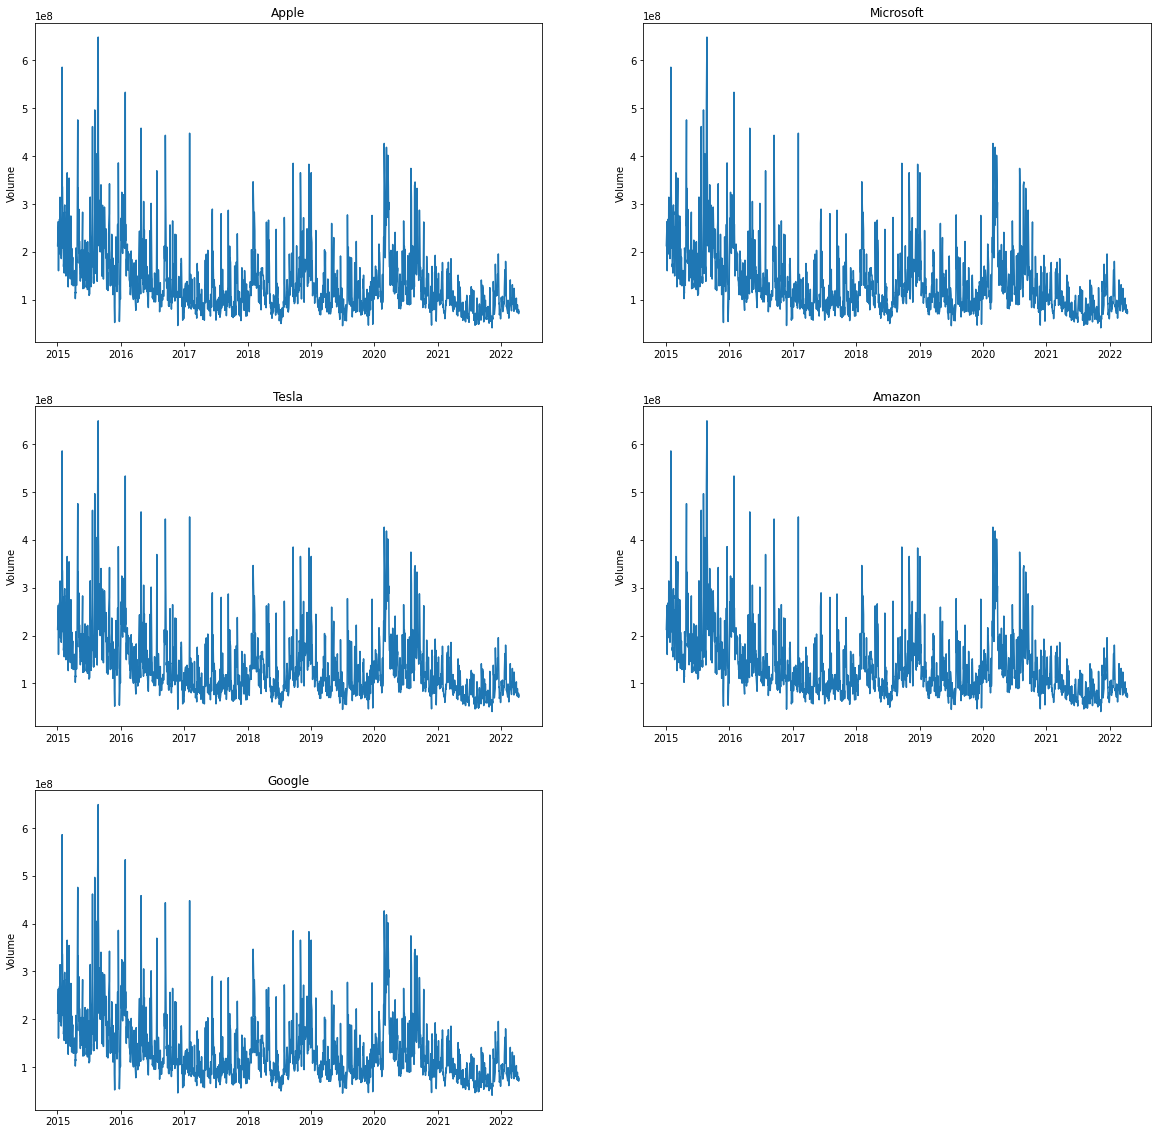

In [85]:
#6 Now lets plot the total volume of stock being traded each day
plt.figure(figsize=(20,20))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company["Date"],company["Volume"])
    plt.title(Companies_Title[index])
    plt.ylabel('Volume')

### What was the moving average of the various stocks ?

In [68]:
#7 calculate Moving Average
Moving_Average_Day=[10,20,50]

for Moving_Average in Moving_Average_Day:
    for company in Companies:
        column_name=f'Moving Average for {Moving_Average} days'
        company[column_name]=company['Adj Close'].rolling(Moving_Average).mean()

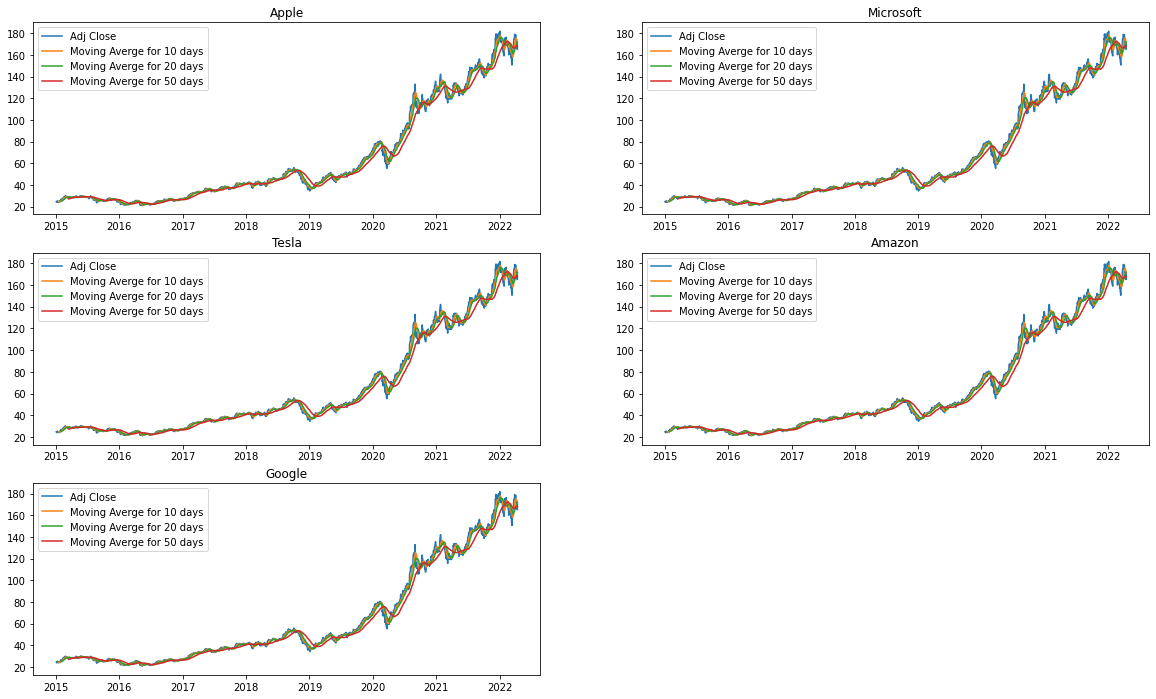

In [72]:
plt.figure(figsize=(20,12))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company["Date"], company["Adj Close"])
    plt.plot(company["Date"], company["Moving Average for 10 days"])
    plt.plot(company["Date"], company["Moving Average for 20 days"])
    plt.plot(company["Date"], company["Moving Average for 50 days"])
    plt.title(Companies_Title[index])
    plt.legend(("Adj Close","Moving Averge for 10 days","Moving Averge for 20 days","Moving Averge for 50 days"))

In [73]:
Moving_Average_Day2=[100,200,500]

for Moving_Average in Moving_Average_Day2:
    for company in Companies:
        column_name=f'Moving Average for {Moving_Average} days'
        company[column_name]=company['Adj Close'].rolling(Moving_Average).mean()

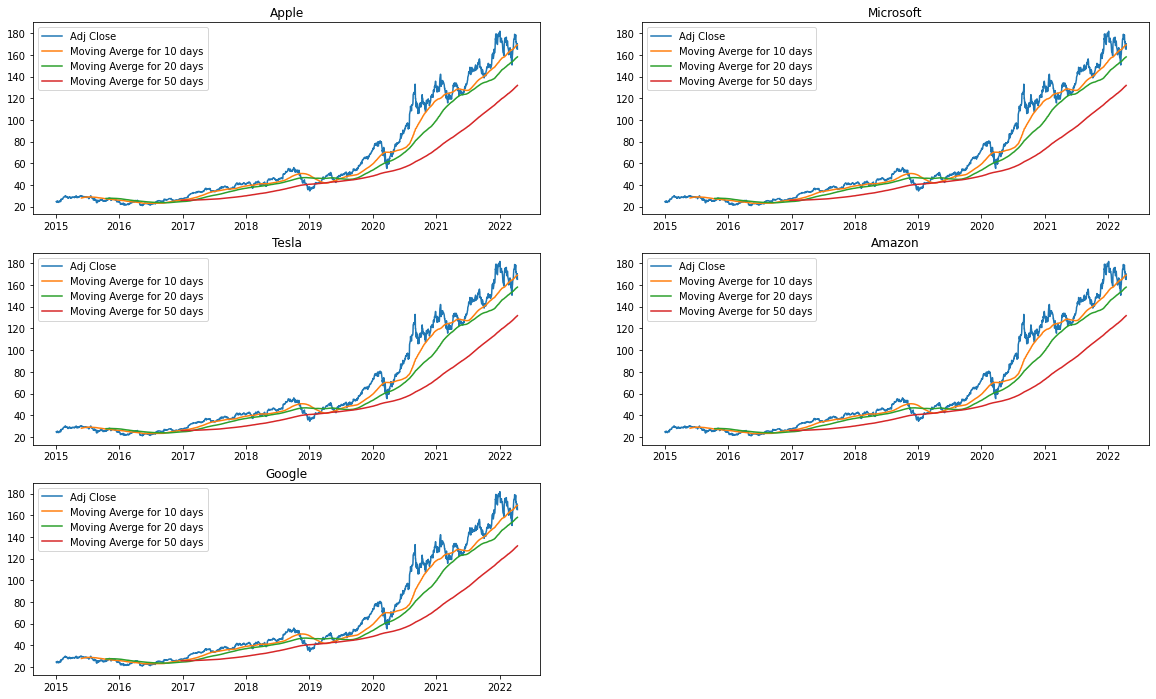

In [75]:
plt.figure(figsize=(20,12))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index+1)
    plt.plot(company["Date"], company["Adj Close"])
    plt.plot(company["Date"], company["Moving Average for 100 days"])
    plt.plot(company["Date"], company["Moving Average for 200 days"])
    plt.plot(company["Date"], company["Moving Average for 500 days"])
    plt.title(Companies_Title[index])
    plt.legend(("Adj Close","Moving Averge for 10 days","Moving Averge for 20 days","Moving Averge for 50 days"))

### What was the daily return of the stock on average ?

In [76]:
# 8. daily return
for company in Companies:
    company["Daily Return"]=company["Adj Close"].pct_change()

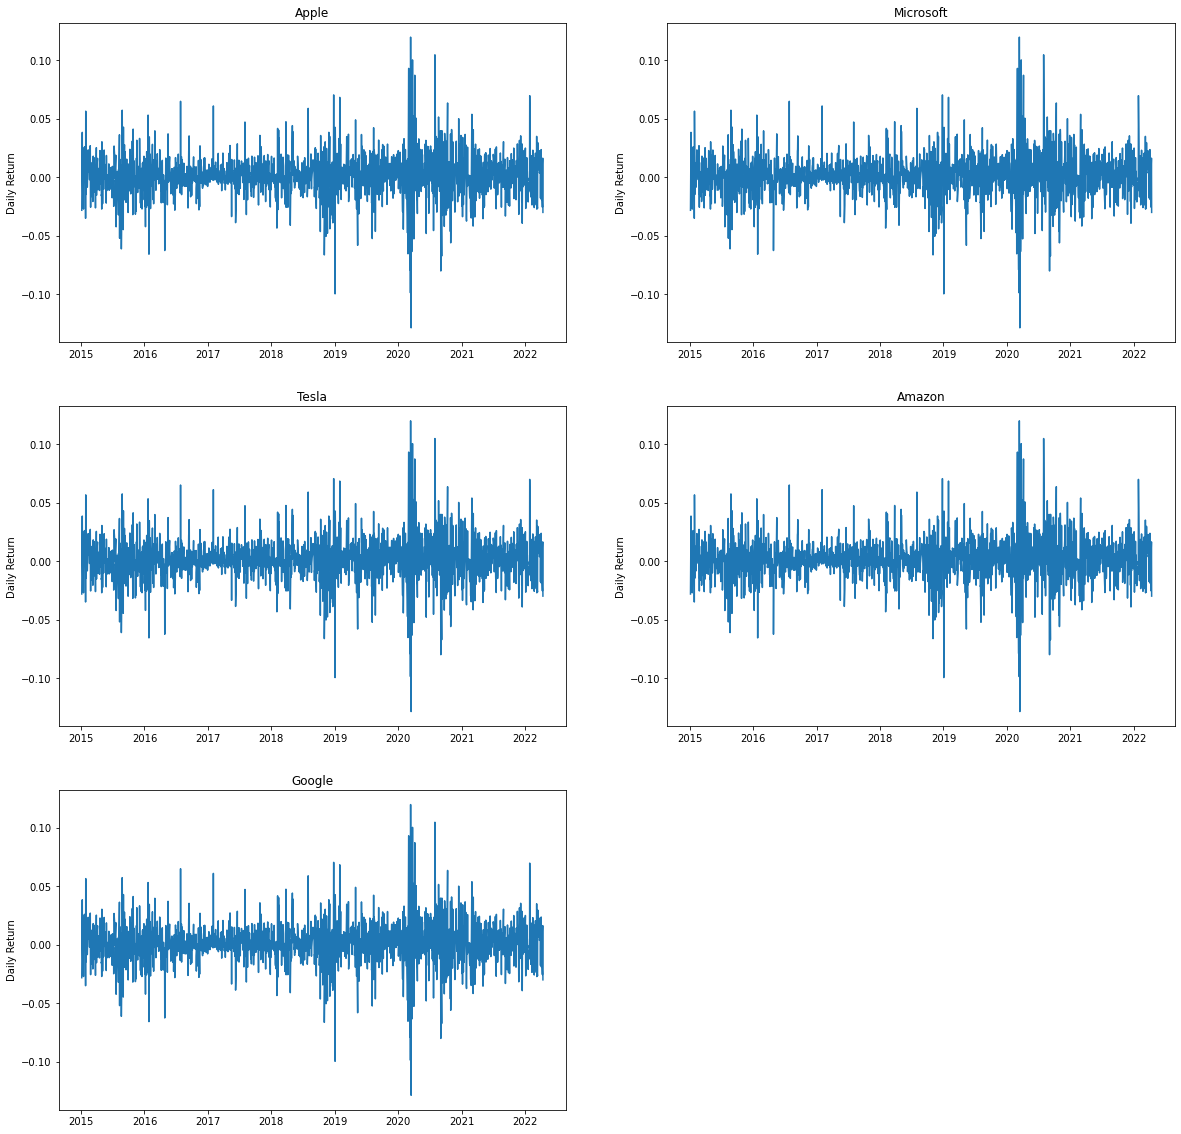

In [84]:
plt.figure(figsize=(20,20))
for index,company in enumerate(Companies):
    plt.subplot(3,2,index + 1)
    plt.plot(company["Date"],company["Daily Return"])
    plt.title(Companies_Title[index])
    plt.ylabel("Daily Return")

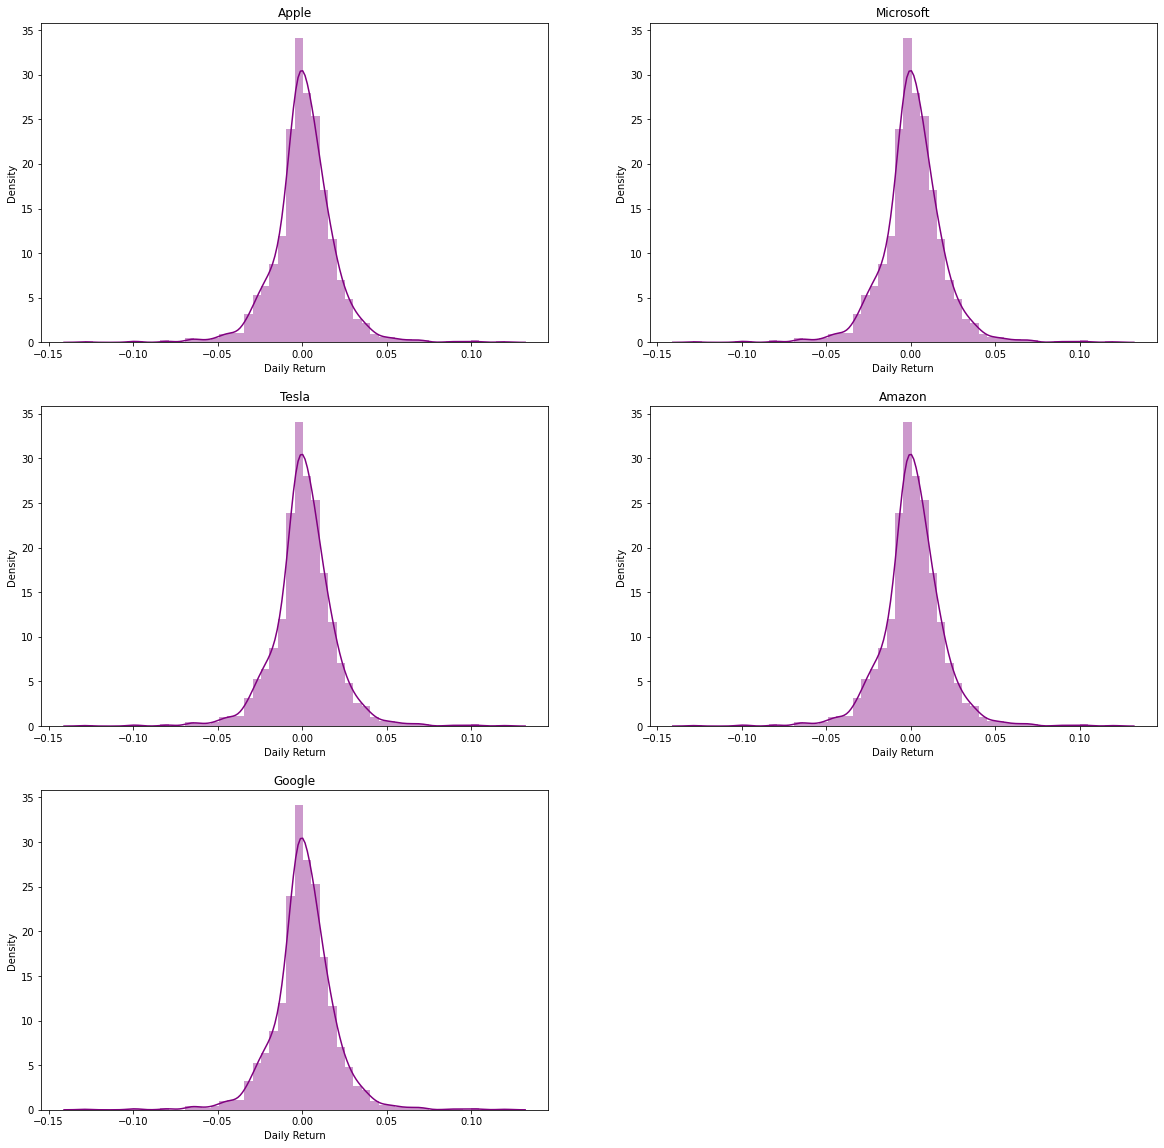

In [96]:
# distplot is a deprecated function, so to ignore warnings, the filterwarnings function is used.
# 9. get an overall at the average daily return using a histogram
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 20))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "purple")
  plt.title(Companies_Title[index])

In [99]:
#10 find kurtosis value
print("Kurtosis value")
for index,company in enumerate(Companies):
    print(f'{Companies_Title[index]}: {company["Daily Return"].kurtosis()}')

Kurtosis value
Apple: 5.96159575441665
Microsoft: 5.96159575441665
Tesla: 5.96159575441665
Amazon: 5.96159575441665
Google: 5.96159575441665


In [101]:
# 11 find out correlation between stocks closing price

Companies_returns=pd.DataFrame()
Companies_returns["AAPL"]=AAPL_df["Adj Close"]
Companies_returns["TSLA"]=TSLA_df["Adj Close"]
Companies_returns["GOOG"]=GOOG_df["Adj Close"]
Companies_returns["MSFT"]=MSFT_df["Adj Close"]
Companies_returns["AMZN"]=AMZN_df["Adj Close"]
Companies_returns.head()

,AAPL,TSLA,GOOG,MSFT,AMZN
0,24.714506,24.714506,24.714506,24.714506,24.714506
1,24.018257,24.018257,24.018257,24.018257,24.018257
2,24.020517,24.020517,24.020517,24.020517,24.020517
3,24.357342,24.357342,24.357342,24.357342,24.357342
4,25.293211,25.293211,25.293211,25.293211,25.293211


In [102]:
#12 Companies_Daily_returns contains percentage daily returns of all the companies
Companies_Daily_returns = Companies_returns.pct_change()
Companies_Daily_returns.head()

,AAPL,TSLA,GOOG,MSFT,AMZN
0,NaN,NaN,NaN,NaN,NaN
1,-0.028172,-0.028172,-0.028172,-0.028172,-0.028172
2,0.000094,0.000094,0.000094,0.000094,0.000094
3,0.014022,0.014022,0.014022,0.014022,0.014022
4,0.038422,0.038422,0.038422,0.038422,0.038422


<AxesSubplot:>

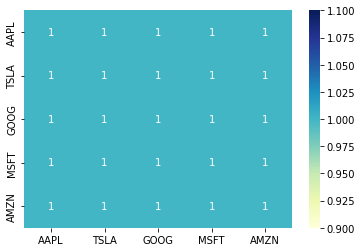

In [103]:
sns.heatmap(Companies_returns.corr(),annot=True,cmap="YlGnBu")

In [105]:
Companies_returns.corr()

,AAPL,TSLA,GOOG,MSFT,AMZN
AAPL,1.0,1.0,1.0,1.0,1.0
TSLA,1.0,1.0,1.0,1.0,1.0
GOOG,1.0,1.0,1.0,1.0,1.0
MSFT,1.0,1.0,1.0,1.0,1.0
AMZN,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:>

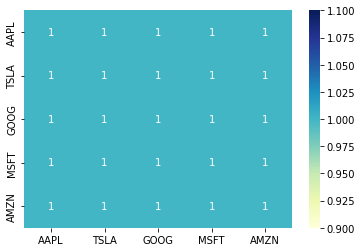

In [106]:
sns.heatmap(Companies_Daily_returns.corr(),annot=True,cmap="YlGnBu")

In [107]:
Companies_Daily_returns.corr()

,AAPL,TSLA,GOOG,MSFT,AMZN
AAPL,1.0,1.0,1.0,1.0,1.0
TSLA,1.0,1.0,1.0,1.0,1.0
GOOG,1.0,1.0,1.0,1.0,1.0
MSFT,1.0,1.0,1.0,1.0,1.0
AMZN,1.0,1.0,1.0,1.0,1.0


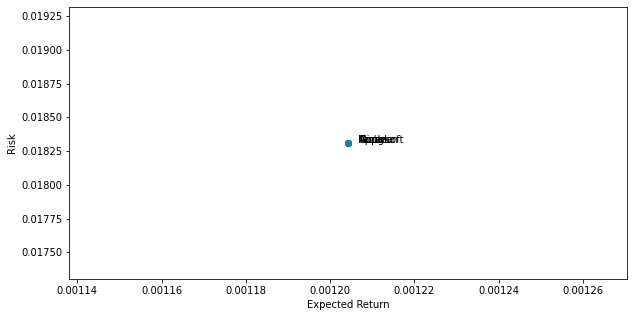

In [114]:
Return=Companies_Daily_returns.dropna()

plt.figure(figsize=(10,5))
plt.scatter(Return.mean(),Return.std())
plt.xlabel('Expected Return')
plt.ylabel("Risk")

for label,x,y in zip(Companies_Title,Return.mean(),Return.std()):
    plt.annotate(label,xy=(x,y),xytext=(10,0),textcoords='offset points')

In [115]:
# !pip install pmdarima

In [118]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [122]:
# !pip install pyramid

In [131]:
# !pip install pmdarima

In [133]:
#!pip install pmdarima

In [134]:
#!pip install pyramid-arima

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ksawa\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ksawa\\AppData\\Local\\Temp\\pip-install-7o4lys0i\\pyramid-arima_5242375b1b874d1da49d09957d3f5dd8\\setup.py'"'"'; __file__='"'"'C:\\Users\\ksawa\\AppData\\Local\\Temp\\pip-install-7o4lys0i\\pyramid-arima_5242375b1b874d1da49d09957d3f5dd8\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ksawa\AppData\Local\Temp\pip-wheel-nan2jf0c'
       cwd: C:\Users\ksawa\AppData\Local\Temp\pip-install-7o4lys0i\pyramid-arima_5242375b1b874d1da49d09957d3f5dd8\
  Complete output (817 lines):
  Partial import of pyramid during the build process.
  
  Requirements: ['Cython>=0.23\nnumpy>

  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima: started
    Running setup.py install for pyramid-arima: still running...
    Running setup.py install for pyramid-arima: still running...
    Running setup.py install for pyramid-arima: finished with status 'error'



  WARN: Could not locate executable g77
  WARN: Could not locate executable f77
  INFO: customize IntelVisualFCompiler
  WARN: Could not locate executable ifort
  WARN: Could not locate executable ifl
  INFO: customize AbsoftFCompiler
  WARN: Could not locate executable f90
  INFO: customize CompaqVisualFCompiler
  WARN: Could not locate executable DF
  INFO: customize IntelItaniumVisualFCompiler
  WARN: Could not locate executable efl
  INFO: customize Gnu95FCompiler
  INFO: Found executable C:\Users\ksawa\anaconda3\Library\mingw-w64\bin\gfortran.exe
  Using built-in specs.
  COLLECT_GCC=C:\Users\ksawa\anaconda3\Library\mingw-w64\bin\gfortran.exe
  COLLECT_LTO_WRAPPER=C:/Users/ksawa/anaconda3/Library/mingw-w64/bin/../lib/gcc/x86_64-w64-mingw32/5.3.0/lto-wrapper.exe
  Target: x86_64-w64-mingw32
  Configured with: ../gcc-5.3.0/configure --prefix=/mingw64 --with-local-prefix=/mingw64/local --build=x86_64-w64-mingw32 --host=x86_64-w64-mingw32 --target=x86_64-w64-mingw32 --with-native-sys

  INFO: compile options: '-D__MSVCRT_VERSION__=0x1916 -DMS_WIN64=1 -IC:\Users\ksawa\anaconda3\include -IC:\Users\ksawa\anaconda3\include -c'
  extra options: '-msse -msse2 -Werror'
  INFO: CCompilerOpt.cc_test_flags[1021] : testing flags (-msse3)
  INFO: C compiler: gcc -g -DDEBUG -DMS_WIN64 -O0 -Wall -Wstrict-prototypes
  
  INFO: compile options: '-D__MSVCRT_VERSION__=0x1916 -DMS_WIN64=1 -IC:\Users\ksawa\anaconda3\include -IC:\Users\ksawa\anaconda3\include -c'
  extra options: '-msse3'
  INFO: CCompilerOpt.feature_test[1474] : testing feature 'SSE3' with flags (-msse -msse2 -msse3)
  INFO: C compiler: gcc -g -DDEBUG -DMS_WIN64 -O0 -Wall -Wstrict-prototypes
  
  INFO: compile options: '-D__MSVCRT_VERSION__=0x1916 -DMS_WIN64=1 -IC:\Users\ksawa\anaconda3\include -IC:\Users\ksawa\anaconda3\include -c'
  extra options: '-msse -msse2 -msse3 -Werror'
  INFO: CCompilerOpt.__init__[1718] : check requested dispatch-able features
  INFO: CCompilerOpt.cc_test_flags[1021] : testing flags (-mssse3

    pyramid\arima\_arima.c:26130:20: error: 'PyThreadState {aka struct _ts}' has no member named 'exc_value'
         *value = tstate->exc_value;
                        ^
    pyramid\arima\_arima.c:26131:17: error: 'PyThreadState {aka struct _ts}' has no member named 'exc_traceback'
         *tb = tstate->exc_traceback;
                     ^
    pyramid\arima\_arima.c: In function '__Pyx__ExceptionReset':
    pyramid\arima\_arima.c:26138:22: error: 'PyThreadState {aka struct _ts}' has no member named 'exc_type'
         tmp_type = tstate->exc_type;
                          ^
    pyramid\arima\_arima.c:26139:23: error: 'PyThreadState {aka struct _ts}' has no member named 'exc_value'
         tmp_value = tstate->exc_value;
                           ^
    pyramid\arima\_arima.c:26140:20: error: 'PyThreadState {aka struct _ts}' has no member named 'exc_traceback'
         tmp_tb = tstate->exc_traceback;
                        ^
    pyramid\arima\_arima.c:26141:11: error: 'PyThreadStat

In [137]:
# !pip install pmdarima

In [147]:
import  scipy.signal.signaltools


def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [148]:
from pmdarima.arima import auto_arima

In [149]:
#Arima model